In [8]:
import pyemma

C:\Users\Seldon\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
C:\Users\Seldon\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
C:\Users\Seldon\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead


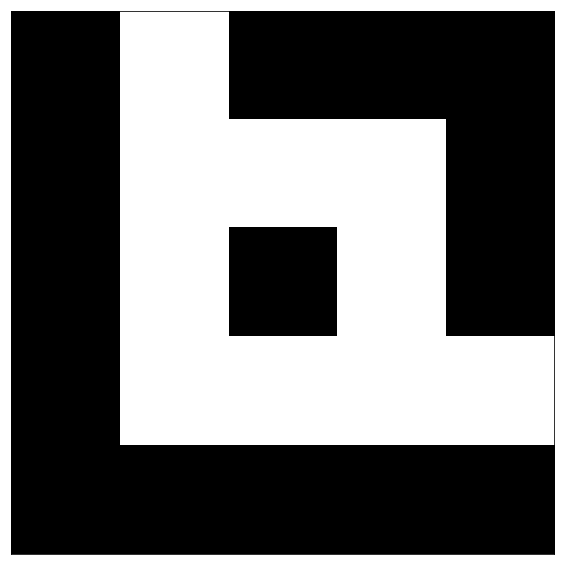

[[1 0 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 1 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 0 0 1 0 1]
 [1 0 1 0 1 1 1 1 1 0 1]
 [1 0 1 0 1 0 0 0 0 0 1]
 [1 0 1 0 1 0 1 1 1 0 1]
 [1 0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 1 1 0 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1]]


C:\Users\Seldon\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: This function is deprecated. Please call randint(0, 5 + 1) instead
C:\Users\Seldon\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead


In [29]:
import numpy
from numpy.random import random_integers as randint
import matplotlib.pyplot as pyplot

def maze(width=50, height=50, complexity=.75, density=.75):
    # Only odd shapes
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity * (5 * (shape[0] + shape[1])))
    density    = int(density * ((shape[0] // 2) * (shape[1] // 2)))
    # Build actual maze
    Z = numpy.zeros(shape, dtype=int)
    # Fill borders
    Z[0, :] = Z[-1, :] = 1
    Z[:, 0] = Z[:, -1] = 1
    Z[0, 1] = Z[height-1,height] = 0
    # Make aisles
    for i in range(density):
        x, y = randint(0, shape[1] // 2) * 2, randint(0, shape[0] // 2) * 2
        Z[y, x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:             neighbours.append((y, x - 2))
            if x < shape[1] - 2:  neighbours.append((y, x + 2))
            if y > 1:             neighbours.append((y - 2, x))
            if y < shape[0] - 2:  neighbours.append((y + 2, x))
            if len(neighbours):
                y_,x_ = neighbours[randint(0, len(neighbours) - 1)]
                if Z[y_, x_] == 0:
                    Z[y_, x_] = 1
                    Z[y_ + (y - y_) // 2, x_ + (x - x_) // 2] = 1
                    x, y = x_, y_
    return Z
#    for x in range(width):
#        for y in range(height):
#           if Z[]

pyplot.figure(figsize=(10, 10))
pyplot.imshow(maze(4,4), cmap=pyplot.cm.binary, interpolation='nearest')
pyplot.xticks([]), pyplot.yticks([])
pyplot.show()
print(maze(10,10))



In [19]:
M = pyemma.msm.estimate_markov_model(maze(10,10), lag=12)

C:\Users\Seldon\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: This function is deprecated. Please call randint(0, 5 + 1) instead
C:\Users\Seldon\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
C:\Users\Seldon\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
C:\Users\Seldon\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


TypeError: Argument dtraj is not a discrete trajectory - only list of integers or int-ndarrays are allowed. Check type of array([[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [47]:
from pyemma import msm
import numpy as np
np.set_printoptions(precision=3)
M=([[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
#mm = msm.estimate_hidden_markov_model(M, 2,2)
mm = msm.estimate_markov_model(M, 4)
print(mm.transition_matrix)
print(mm.active_set)


[[ 0.781  0.219]
 [ 0.156  0.844]]
[0 1]


In [67]:
def search(grid,x, y):
    if grid[x][y] == 2:
        print('found at' + repr(x) + repr(y))
        return True
    elif grid[x][y] == 1:
        print( 'wall at' + repr(x) + repr(y))
        return False
    elif grid[x][y] == 3:
        print( 'visited at' + repr(x) + repr(y))
        return False
     
    print('visiting' + repr(x) + repr(y))
 
    # mark as visited
    grid[x][y] = 3
 
    # explore neighbors clockwise starting by the one on the right
    if ((x < len(grid)-1 and search(x+1, y))
        or (y > 0 and search(x, y-1))
        or (x > 0 and search(x-1, y))
        or (y < len(grid)-1 and search(x, y+1))):
        return True
 
    return False
print(M[0][1])
search(M,0, 1)

3
visited at01


False